In [1]:
'''
At first we need to understand the problem and decide everything like inputs,outputs,what type of algorithm should be used.

Here we are trying to classify the reviews given by people into positive or negative.So we must use supervised learning i.e 
cnn binary classification and inputs must be 1D tensors as they are not images but data and ouput must be a probalilty of 
binary classification.

'''

'\nAt first we need to understand the problem and decide everything like inputs,outputs,what type of algorithm should be used.\n\nHere we are trying to classify the reviews given by people into positive or negative.So we must use supervised learning i.e \ncnn binary classification and inputs must be 1D tensors as they are not images but data and ouput must be a probalilty of \nbinary classification.\n\n'

In [2]:
# STEP - 1
# Getiing data

# first we need to get the data 
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
# here we take some data from the data set.
# num_words = 10000 means that these sentenses only contain top 10000 words which are commonly used by the people
# all words are given a number like here we took words which are numbers till 10000
# in train and test data instead of word we use these indicies.
# labels contain either 0 negative or 1 postive.

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
#let us look at review
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
#let us look at the label for this review
train_labels[0]

1

In [6]:
#let us decode the train data are see what it is telling

# its is an object for the wordindex
word_index = imdb.get_word_index() 

# we will get all words and indicies related to the word from here, we will reverse it as we need words from indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# we will take a training sample and run the with dict we created , ? is the default value and the set is shifted by 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# STEP - 2
# preparing data to input into model
# here we need 1D tensor where the vectors indicates the sequence of words or words used

# import numpy to do tensor operations
import numpy as np

# the main feature of input data is that it must lie between -1,1 or 0,1 and should be normalized and should be float
# here is a function which make a input data 1000 length and if index 500 word is present at that index it will be 1 else 0
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.   
    return results

#applying function on our data set
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# we have a 2d array with 25000 samples and every sample with a 10000 len vector
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
# we need to prerpare the labels to float as well
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [11]:
# bisecting training set into traiing and valdation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#import models and layers
from keras import models
from keras import layers

In [13]:
#STEP 3
# creating model

model = models.Sequential()

#as it is a 1d input we need to use dense layers 
# we use relu activation because if we not apply relu there wil be only linearr transformations
#no of layers , no of elements in layers are imp
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

# here in the last layer we use sigmoid to get probability of the class if it is 0.7 its is positive review 0-1
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# optimizer , loss function , stats
# optimizer is rmsprop as it is a classification problem 
# binary crossentropy because it is a binary clasiification
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321,633
Trainable params: 321,633
Non-trainable params: 0
_________________________________________________________________


In [15]:
# training
# batches
# epochs
# training set
# validation set
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 430us/step - loss: 0.5053 - accuracy: 0.7634 - val_loss: 0.3507 - val_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.2676 - accuracy: 0.9039 - val_loss: 0.3289 - val_accuracy: 0.8665
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1968 - accuracy: 0.9281 - val_loss: 0.3258 - val_accuracy: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1481 - accuracy: 0.9499 - val_loss: 0.3123 - val_accuracy: 0.8807oss: 0.1326 - 
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1241 - accuracy: 0.9561 - val_loss: 0.3204 - val_accuracy: 0.8832
Epoch 6/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0931 - accuracy: 0.9698 - val_loss: 0.3333 - val_accuracy: 0.8822
Epoch 7/20
15000/15000 [=======================

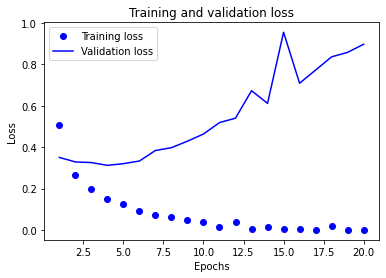

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

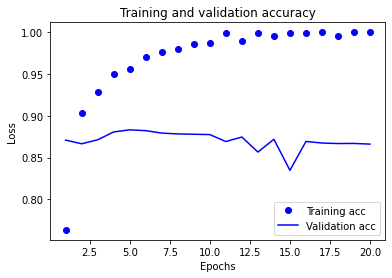

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#predict
model.predict(x_test[0:1])

array([[0.00078987]], dtype=float32)

In [19]:
# to reduce validation loss we have many methods / overfiting
#Get more training data.
#Reduce the capacity of the network.
#Add weight regularization.
#Add dropout.

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321,633
Trainable params: 321,633
Non-trainable params: 0
_________________________________________________________________


In [24]:
len(x_train[0])

10000